In [1]:
# Импортируем библиотеки
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt

import seaborn as sns
%matplotlib inline

In [4]:
data = pd.read_csv('Umbrella_LasPlagas.csv', sep = ';')

In [5]:
data.head()

,ID_SIMPERS,FLAG_MUT,AGE,DOSE,HEIGHT,WEIGHT,GENDER,IS_CAUCAS,HAS_APPENDIX,HAS_ALLERGY
0,10002748,1.0,17.0,19.0,164.0,120.0,M,NO,NO,NO
1,10003438,0.0,62.0,17.0,169.0,137.0,M,YES,YES,NO
2,10004371,1.0,5.0,24.0,100.0,21.0,M,YES,NO,NO
3,10002836,1.0,13.0,29.0,154.0,48.0,F,NO,NO,NO
4,10000347,0.0,35.0,28.0,198.0,121.0,M,YES,YES,YES


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4887 entries, 0 to 4886
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID_SIMPERS    4887 non-null   int64  
 1   FLAG_MUT      4866 non-null   float64
 2   AGE           4859 non-null   float64
 3   DOSE          4856 non-null   float64
 4   HEIGHT        4776 non-null   float64
 5   WEIGHT        4776 non-null   float64
 6   GENDER        4844 non-null   object 
 7   IS_CAUCAS     4846 non-null   object 
 8   HAS_APPENDIX  4846 non-null   object 
 9   HAS_ALLERGY   4856 non-null   object 
dtypes: float64(5), int64(1), object(4)
memory usage: 381.9+ KB


In [11]:
# смотрим кол-во уникальных значений в столбцах:
data.nunique()

ID_SIMPERS      4887
FLAG_MUT           2
AGE               81
DOSE              50
HEIGHT           114
WEIGHT           143
GENDER             2
IS_CAUCAS          2
HAS_APPENDIX       2
HAS_ALLERGY        2
dtype: int64

In [18]:
data.isnull().sum()

ID_SIMPERS        0
FLAG_MUT         21
AGE              28
DOSE             31
HEIGHT          111
WEIGHT          111
GENDER           43
IS_CAUCAS        41
HAS_APPENDIX     41
HAS_ALLERGY      31
dtype: int64

In [19]:
# Убераем Null, но учитываем, что лишаемся не более 5% данных
data = data.dropna()

In [27]:
# Перекодируем строки в числа, так как модели не работают со строками:
data.GENDER = data.GENDER.map({'M':1, 'F':0})
data.IS_CAUCAS = data.IS_CAUCAS.map({'YES':1, 'NO':0})
data.HAS_APPENDIX = data.HAS_APPENDIX.map({'YES':1, 'NO':0})
data.HAS_ALLERGY = data.HAS_ALLERGY.map({'YES':1, 'NO':0})
# Можно еще через replace() сделать

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4772 entries, 0 to 4886
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID_SIMPERS    4772 non-null   int64  
 1   FLAG_MUT      4772 non-null   float64
 2   AGE           4772 non-null   float64
 3   DOSE          4772 non-null   float64
 4   HEIGHT        4772 non-null   float64
 5   WEIGHT        4772 non-null   float64
 6   GENDER        4772 non-null   int64  
 7   IS_CAUCAS     4772 non-null   int64  
 8   HAS_APPENDIX  4772 non-null   int64  
 9   HAS_ALLERGY   4772 non-null   int64  
dtypes: float64(5), int64(5)
memory usage: 410.1 KB


## Дерево решений:

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [30]:
x_train, x_test, y_train, y_test = train_test_split(
    data.drop(['FLAG_MUT'], axis=1),
    data.FLAG_MUT,
    test_size= 0.2,
    random_state = 0,
    stratify= data.FLAG_MUT)

### Смотрим тренировочные сеты

In [31]:
x_train

,ID_SIMPERS,AGE,DOSE,HEIGHT,WEIGHT,GENDER,IS_CAUCAS,HAS_APPENDIX,HAS_ALLERGY
1998,10003342,31.0,19.0,205.0,140.0,1,1,1,1
4143,10004418,35.0,35.0,188.0,51.0,1,0,0,0
1224,10002657,16.0,41.0,165.0,148.0,0,0,1,0
3509,10001628,44.0,15.0,171.0,110.0,0,0,0,1
407,10004001,51.0,29.0,174.0,77.0,1,0,1,0
...,...,...,...,...,...,...,...,...,...
2211,10000685,65.0,26.0,160.0,110.0,0,1,1,0
4573,10001102,54.0,13.0,170.0,148.0,0,1,1,0
1299,10000518,14.0,7.0,149.0,50.0,1,1,1,0
2540,10002862,73.0,8.0,180.0,52.0,1,0,1,0


In [32]:
y_train

1998    1.0
4143    0.0
1224    0.0
3509    1.0
407     1.0
       ... 
2211    0.0
4573    0.0
1299    0.0
2540    0.0
4613    1.0
Name: FLAG_MUT, Length: 3817, dtype: float64

In [33]:
tree = DecisionTreeClassifier()

In [34]:
tree.fit(x_train, y_train)

DecisionTreeClassifier()

In [35]:
y_pred = tree.predict(x_test)

In [39]:
acc = accuracy_score(y_test, y_pred)
acc

0.6670157068062827

Мы получили результат 66,7%, что не очень хорошо и наша модель часто ошибается.
Чтобы такого не было, нужно правильно подготавливать данные.
Вот пара способов:
1. Вертикальная подготовка - избавление о резких выбросов.
2. Горизантальная подготовка - не закладываем те данные в модель, которые имеют низкую корреляцию, так как они создают большой белый шум, что мешает модели.
3. В будущем в модели еще важно настраивать глубину лепестков и их количество. Но пока возьмем первые два пункта.

In [36]:
cm = confusion_matrix(y_test, y_pred)

In [37]:
cm

array([[425, 160],
       [158, 212]], dtype=int64)

<AxesSubplot:>

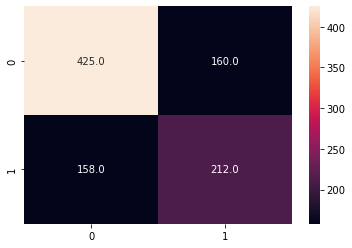

In [40]:
sns.heatmap(cm, annot = True, fmt = '.1f')
#fmt - формат данных

#### План по улучшению модели:
1. Убрать колонку с ID из модели.
2. Убрать выбросы.
3. Нормировать данные с непрерывной школой. 

По формуле = (переменная - мин.переменная)/(макс.переменная - мин.переменная)

In [127]:
data_2 = data

In [128]:
data_2.describe()

,ID_SIMPERS,FLAG_MUT,AGE,DOSE,HEIGHT,WEIGHT,GENDER,IS_CAUCAS,HAS_APPENDIX,HAS_ALLERGY
count,4.772000e+03,4772.000000,4772.000000,4772.000000,4772.000000,4772.000000,4772.000000,4772.000000,4772.000000,4772.000000
mean,1.000244e+07,0.387469,36.626153,24.887888,177.933361,91.814753,0.580050,0.630763,0.790444,0.203269
std,1.408816e+03,0.487223,23.058650,11.001658,30.325914,47.545709,0.493602,0.482649,0.407034,0.402473
min,1.000000e+07,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000123e+07,0.000000,19.000000,17.000000,167.000000,63.000000,0.000000,0.000000,1.000000,0.000000
50%,1.000244e+07,0.000000,31.000000,25.000000,181.000000,91.000000,1.000000,1.000000,1.000000,0.000000
75%,1.000367e+07,1.000000,53.000000,32.000000,196.000000,121.000000,1.000000,1.000000,1.000000,0.000000
max,1.000489e+07,1.000000,250.000000,50.000000,900.000000,1159.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:>

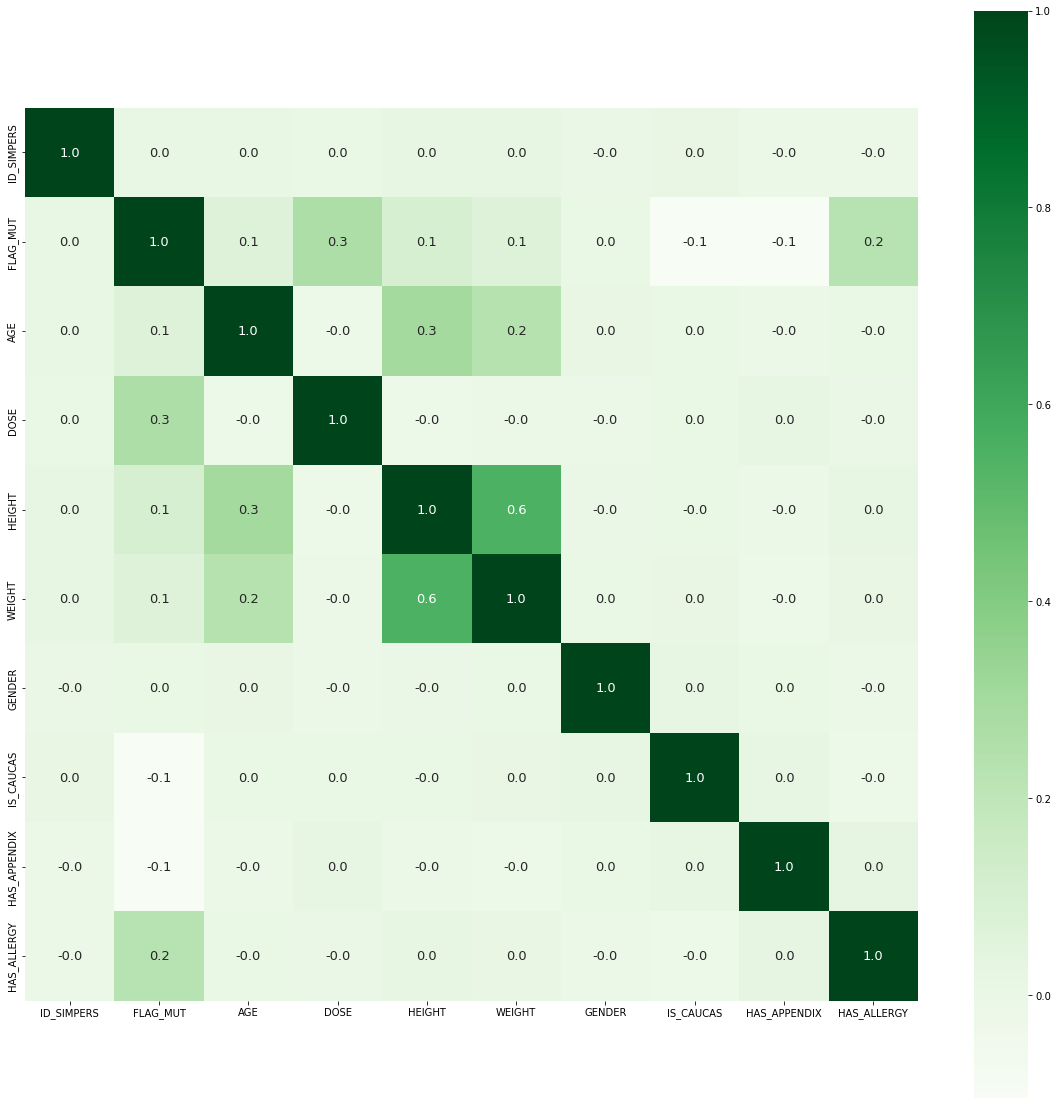

In [129]:
corr = data_2.corr()

plt.figure(figsize = (20, 20))
sns.heatmap(corr, cbar=True, square=True, fmt ='.1f', annot=True, annot_kws={'size': 13}, cmap='Greens')

In [130]:
data_2 = data_2[data_2['HEIGHT']<=250]
data_2 = data_2[data_2['WEIGHT']<= 200]
data_2 = data_2[data_2['AGE']<=120]
data_2 = data_2.drop(['ID_SIMPERS'], axis = 1)
data_2 = data_2.drop(['GENDER'], axis = 1)

In [131]:
data_2 = data_2[data_2['HEIGHT']>0]
data_2 = data_2[data_2['WEIGHT']>0]

In [132]:
data_2 = data_2.drop(['IS_CAUCAS'], axis = 1)
data_2 = data_2.drop(['HAS_APPENDIX'], axis = 1)

<AxesSubplot:>

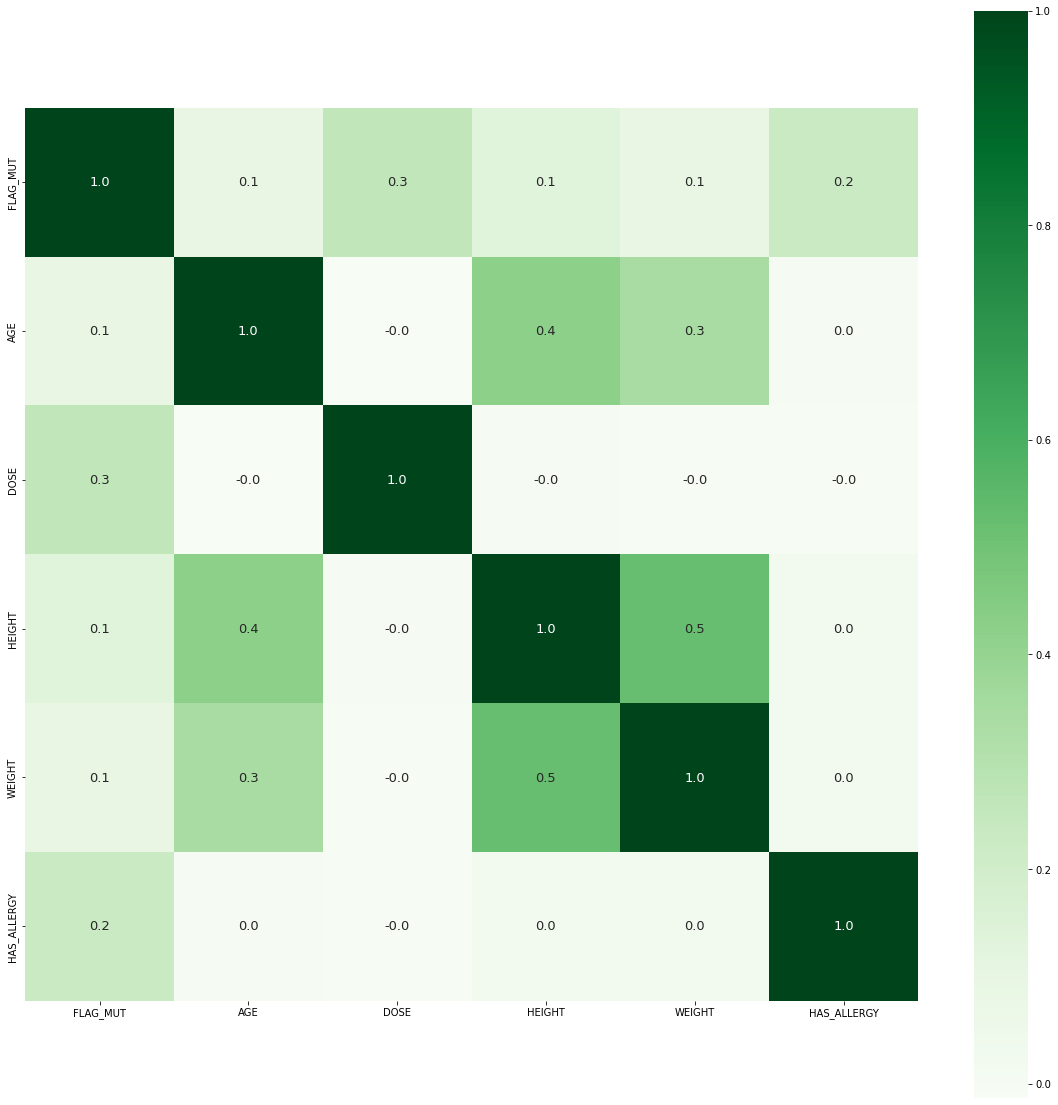

In [133]:
corr = data_2.corr()

plt.figure(figsize = (20, 20))
sns.heatmap(corr, cbar=True, square=True, fmt ='.1f', annot=True, annot_kws={'size': 13}, cmap='Greens')

In [134]:
data_2.AGE = (data_2.AGE-min(data_2.AGE))/(max(data_2.AGE)-min(data_2.AGE))
data_2.HEIGHT = (data_2.HEIGHT-min(data_2.HEIGHT))/(max(data_2.HEIGHT)-min(data_2.HEIGHT))
data_2.WEIGHT = (data_2.WEIGHT-min(data_2.WEIGHT))/(max(data_2.WEIGHT)-min(data_2.WEIGHT))

<AxesSubplot:>

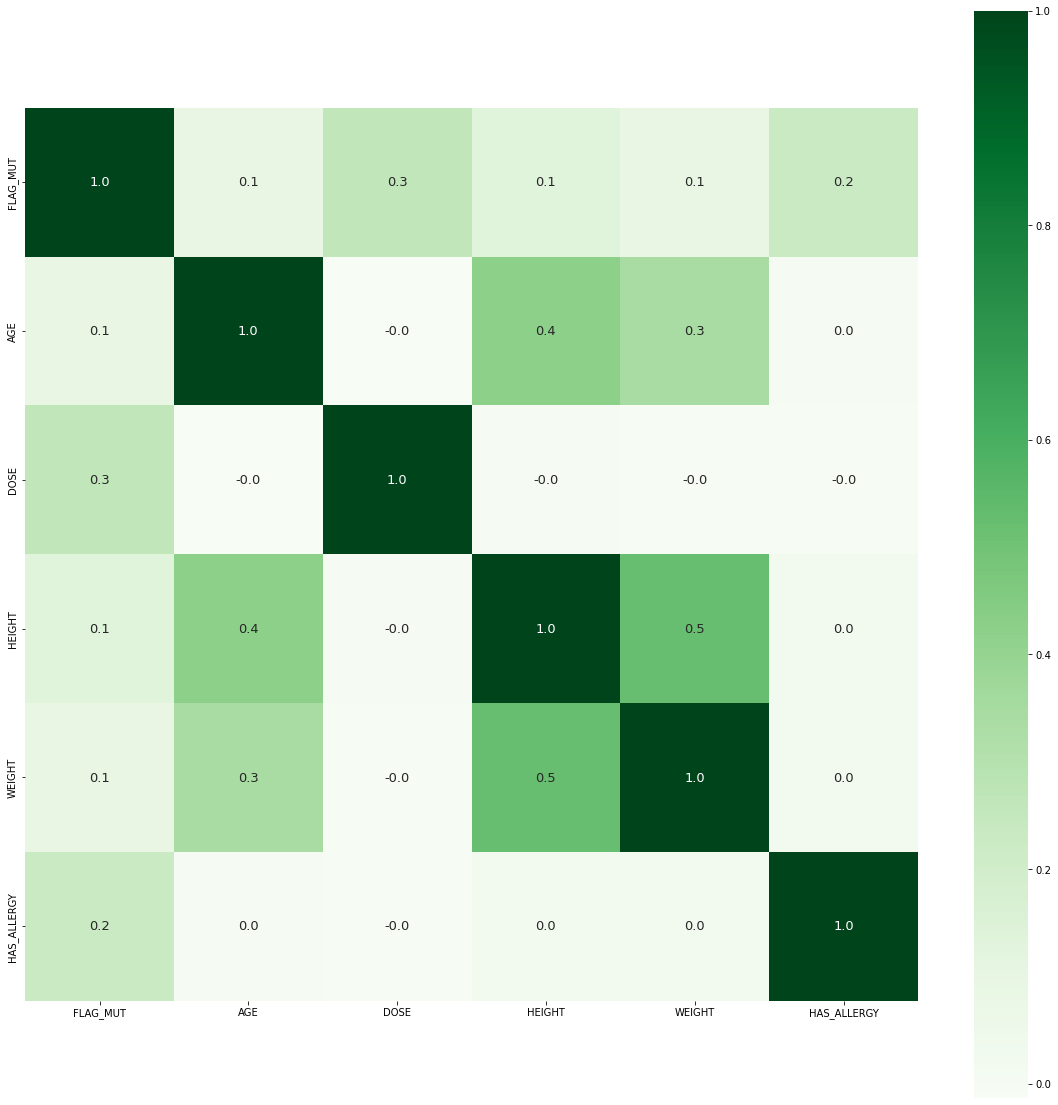

In [135]:
corr = data_2.corr()

plt.figure(figsize = (20, 20))
sns.heatmap(corr, cbar=True, square=True, fmt ='.1f', annot=True, annot_kws={'size': 13}, cmap='Greens')

In [117]:
data_2 = data_2.drop(['AGE'], axis = 1)
data_2 = data_2.drop(['WEIGHT'], axis = 1)
data_2 = data_2.drop(['HEIGHT'], axis = 1)

In [118]:
data_2.describe()

,FLAG_MUT,DOSE,HAS_ALLERGY
count,4738.000000,4738.000000,4738.000000
mean,0.388561,24.899114,0.203461
std,0.487475,11.017745,0.402615
min,0.000000,1.000000,0.000000
25%,0.000000,17.000000,0.000000
50%,0.000000,25.000000,0.000000
75%,1.000000,32.000000,0.000000
max,1.000000,50.000000,1.000000


In [108]:
#data_2.sort_values(by = ['HEIGHT'], ascending = False)

,FLAG_MUT,AGE,DOSE,HEIGHT,WEIGHT,HAS_ALLERGY
1133,1.0,58.0,45.0,210.0,104.0,0
4812,1.0,59.0,19.0,210.0,107.0,0
1351,1.0,18.0,30.0,210.0,108.0,1
485,1.0,25.0,17.0,210.0,51.0,0
1332,1.0,15.0,15.0,210.0,138.0,0
...,...,...,...,...,...,...
3640,0.0,4.0,15.0,97.0,14.0,0
756,1.0,4.0,11.0,97.0,14.0,0
4782,0.0,4.0,34.0,97.0,13.0,0
2123,0.0,4.0,24.0,97.0,13.0,1


## Feature Scaling

In [109]:
#data_2.AGE = (data_2.AGE-min(data_2.AGE))/(max(data_2.AGE)-min(data_2.AGE))
#data_2.HEIGHT = (data_2.HEIGHT-min(data_2.HEIGHT))/(max(data_2.HEIGHT)-min(data_2.HEIGHT))
#data_2.WEIGHT = (data_2.WEIGHT-min(data_2.WEIGHT))/(max(data_2.WEIGHT)-min(data_2.WEIGHT))

# Для непрерывных шкал делаем нормированные значения, чтобы модель лучше отработала

## ML_2

In [119]:
# Сплитуем модель на тренинговую и тестовую выборку:
x_train_2, x_test_2, y_train_2, y_test_2 = train_test_split(
    data_2.drop(['FLAG_MUT'], axis=1),
    data_2.FLAG_MUT,
    test_size= 0.2,
    random_state = 0,
    stratify= data_2.FLAG_MUT)

In [120]:
tree_2 = DecisionTreeClassifier()

In [121]:
# Обучаем модель:
tree_2.fit(x_train_2, y_train_2)

DecisionTreeClassifier()

In [122]:
# Тестируем модель
y_pred_2 = tree_2.predict(x_test_2)

In [123]:
acc_2 = accuracy_score(y_test_2, y_pred_2)

In [124]:
acc_2

0.6835443037974683

In [125]:
cm_2 = confusion_matrix(y_test_2, y_pred_2)
cm_2

array([[496,  84],
       [216, 152]], dtype=int64)

<AxesSubplot:>

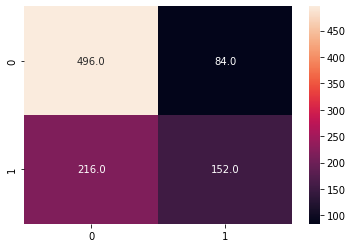

In [126]:
sns.heatmap(cm_2, fmt = '.1f', annot = True)